In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\Analitics\論文データ\Data_note.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')
df

,title,char_count,top_word_1,top_word_2,top_word_3,top_word_4,top_word_5,top_word_6,top_word_7,top_word_8,top_word_9,top_word_10,top_word_11,top_word_12,top_word_13,top_word_14,top_word_15,top_word_16,top_word_17,top_word_18,top_word_19,top_word_20,summary,conclusion_char_count,Link,Author,timestamp,Author1,Author2,Author3,Author4,Author5,Author6,Author7,Author8,Author9,Author10,Author11,author_counts
0,A Soft Sensor Method with Uncertainty-Awarenes...,77094.0,llm,soft,ufss,data,fig,llms,sensor,samples,auxiliary,variable,based,zavs,process,results,industrial,variables,confidence,methods,prediction,pt,A Soft Sensor Method with Uncertainty-Awarenes...,34646.0,https://arxiv.org/abs/2501.01433,"Itsuki Maeda, Yasuhiro Inoue",2025-01-07 14:05:00,Itsuki Maeda,Yasuhiro Inoue,absent,absent,absent,absent,absent,absent,absent,absent,absent,2
1,AI-Driven Diabetic Retinopathy Screening Multi...,32254.0,aidrss,dr,screening,specificity,diabetic,retinopathy,sensitivity,study,images,based,deep,learning,clahe,performance,ci,s,ai,fundus,using,feature,Artificial Intelligence-based Diabetic Retinop...,30549.0,https://arxiv.org/abs/2501.01973,"Di Jin, Xing Liu, Yu Liu, Jia Qing Yap, Andrea...",2025-01-08 11:38:00,Di Jin,Xing Liu,Yu Liu,Jia Qing Yap,Andrea Wong,Adriana Crespo,Qi Lin,Zhiyuan Yin,Qiang Yan,Ryan Ye,absent,10
2,Constraints as Rewards Reinforcement Learning ...,36757.0,t,s,p,cid,constraint,robot,learning,task,policy,pose,constraints,e,m,n,reward,function,g,lagrangian,functions,reinforcement,Reinforcement learning has become an essential...,32234.0,https://arxiv.org/abs/2501.02156,Chien-Ping Lu,2025-01-08 11:38:00,Chien-Ping Lu,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent,1
3,CONTINUUM Detecting APT Attacks through Spatia...,106646.0,graph,s,h,k,j,al,m,data,et,l,c,d,model,y,w,n,detection,node,e,v,TraditionalIntrusionDetectionSystems (IDS) oft...,75113.0,https://arxiv.org/abs/2501.02024,"Elhoucine Elfatimi, Lahcen El fatimi",2025-01-08 11:38:00,Elhoucine Elfatimi,Lahcen El fatimi,absent,absent,absent,absent,absent,absent,absent,absent,absent,2
4,DiReCT Diagnostic Reasoning for Clinical Notes...,90052.0,d,e,gpt,response,r,o,observation,note,g,etal,t,disease,diagnosis,n,k,heart,m,observations,s,p,DiReCT: Diagnostic Reasoning for Clinical Note...,79997.0,https://arxiv.org/abs/2501.02285,"Yingjie Liu, Pengyu Zhang, Ziyao He, Mingsong ...",2025-01-08 11:38:00,Yingjie Liu,Pengyu Zhang,Ziyao He,Mingsong Chen,Xuan Tang,Xian Wei,absent,absent,absent,absent,absent,6
5,"DPO Kernels A Semantically-Aware, Kernel-Enha...",296019.0,x,cid,y,e,kernel,d,kernels,c,rbf,p,o,dpo,hmk,spectral,r,s,l,divergence,polynomial,log,"KERNELS is a Semantically-Aware, Kernel-Enhanc...",245382.0,https://arxiv.org/abs/2501.02832,"Syed Abdul Gaffar Shakhadri, Kruthika KR, Kart...",2025-01-08 11:38:00,Syed Abdul Gaffar Shakhadri,Kruthika KR,Kartik Basavaraj Angadi,absent,absent,absent,absent,absent,absent,absent,absent,3
6,DynaGRAG Exploring the Topology of Information...,49478.0,dynagrag,graph,j,cid,llms,h,ij,inarxiv,retrieval,query,s,w,generation,rag,reasoning,etal,ai,q,edge,r,Graph Retrieval-Augmented Generation (GRAG or ...,36820.0,https://arxiv.org/abs/2501.02964,"Wanpeng Hu, Haodi Liu, Lin Chen, Feng Zhou, Ch...",2025-01-08 11:38:00,Wanpeng Hu,Haodi Liu,Lin Chen,Feng Zhou,Changming Xiao,Qi Yang,Changshui Zhang,absent,absent,absent,absent,7
7,Exploring Gradient Subspaces Addressing and Ov...,76860.0,cid,w,l,n,j,s,t,lora,agg,b,d,g,m,e,fedftg,rank,flexlora,tuning,k,fine,Federated Fine-Tuning of Large Language Models...,49101.0,https://arxiv.org/abs/2501.02981,"Atmane Ayoub Mansour Bahar, Kamel Soaid Ferrah...",2025-01-08 11:38:00,Atmane Ayoub Mansour Bahar,Kamel Soaid Ferrahi,Mohamed-Lamine Messai,Hamida Seba,Karima Amrouche,absent,absent,absent,absent,absent,absent,5
8,Hyperbolic Contrastive Learning for Hierarchic...,52519.0,point,embeddings,cloud,text,learning,hyperbolic,x,image,space,hierarchical,modal,based,meru,contrastive,embedding,y,c,model,

In [10]:
df.columns

Index(['title', 'char_count', 'top_word_1', 'top_word_2', 'top_word_3',
       'top_word_4', 'top_word_5', 'top_word_6', 'top_word_7', 'top_word_8',
       'top_word_9', 'top_word_10', 'top_word_11', 'top_word_12',
       'top_word_13', 'top_word_14', 'top_word_15', 'top_word_16',
       'top_word_17', 'top_word_18', 'top_word_19', 'top_word_20', 'summary',
       'conclusion_char_count', 'Link', 'Author', 'timestamp', 'Author1',
       'Author2', 'Author3', 'Author4', 'Author5', 'Author6', 'Author7',
       'Author8', 'Author9', 'Author10', 'Author11', 'author_counts'],
      dtype='object')

In [18]:
print("title,著者、timestamp、論文の文字数カウント、最頻ワード1、最頻ワード2、最頻ワード3、最頻ワード4、最頻ワード5、最頻ワード6、最頻ワード7、最頻ワード8、最頻ワード9、最頻ワード10、最頻ワード11、最頻ワード12、最頻ワード13、最頻ワード14、最頻ワード15、最頻ワード16、最頻ワード17、最頻ワード18、最頻ワード19、最頻ワード20、要約、結論の文字数、著者、著者1、著者2、著者3、著者4、著者5、著者6、著者7、著者8、著者9、著者10、著者11、著者数")

title,著者、timestamp、論文の文字数カウント、最頻ワード1、最頻ワード2、最頻ワード3、最頻ワード4、最頻ワード5、最頻ワード6、最頻ワード7、最頻ワード8、最頻ワード9、最頻ワード10、最頻ワード11、最頻ワード12、最頻ワード13、最頻ワード14、最頻ワード15、最頻ワード16、最頻ワード17、最頻ワード18、最頻ワード19、最頻ワード20、要約、結論の文字数、著者、著者1、著者2、著者3、著者4、著者5、著者6、著者7、著者8、著者9、著者10、著者11、著者数


In [11]:
df.dtypes

title                            object
char_count                      float64
top_word_1                       object
top_word_2                       object
top_word_3                       object
top_word_4                       object
top_word_5                       object
top_word_6                       object
top_word_7                       object
top_word_8                       object
top_word_9                       object
top_word_10                      object
top_word_11                      object
top_word_12                      object
top_word_13                      object
top_word_14                      object
top_word_15                      object
top_word_16                      object
top_word_17                      object
top_word_18                      object
top_word_19                      object
top_word_20                      object
summary                          object
conclusion_char_count           float64
Link                             object


In [16]:
df_int_float = df.select_dtypes(include={"float64","int64"})
df_int_float.describe()

,char_count,conclusion_char_count,author_counts
count,25.000000,25.000000,25.000000
mean,71236.760000,47762.840000,5.840000
std,52029.087219,47896.443184,3.184337
min,29326.000000,7166.000000,1.000000
25%,42708.000000,16329.000000,3.000000
50%,58864.000000,36820.000000,6.000000
75%,79890.000000,60547.000000,8.000000
max,296019.000000,245382.000000,11.000000


In [19]:
# 論文の長さは、頻出単語の種類や結論の長さと関係があるか？
# 論文の頻出単語から、主要な研究テーマやトレンドを抽出できるか？
# 著者数と論文の長さや内容の特徴に相関はあるか？
# 結論の長さは、論文の長さや要約と関係があるか？
# 研究の特徴を頻出単語から分類できるか？

C:\Users\sk062\AppData\Local\Temp\ipykernel_15680\1826052950.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X, rotation=45, ha="right")  # x軸ラベルを45度回転


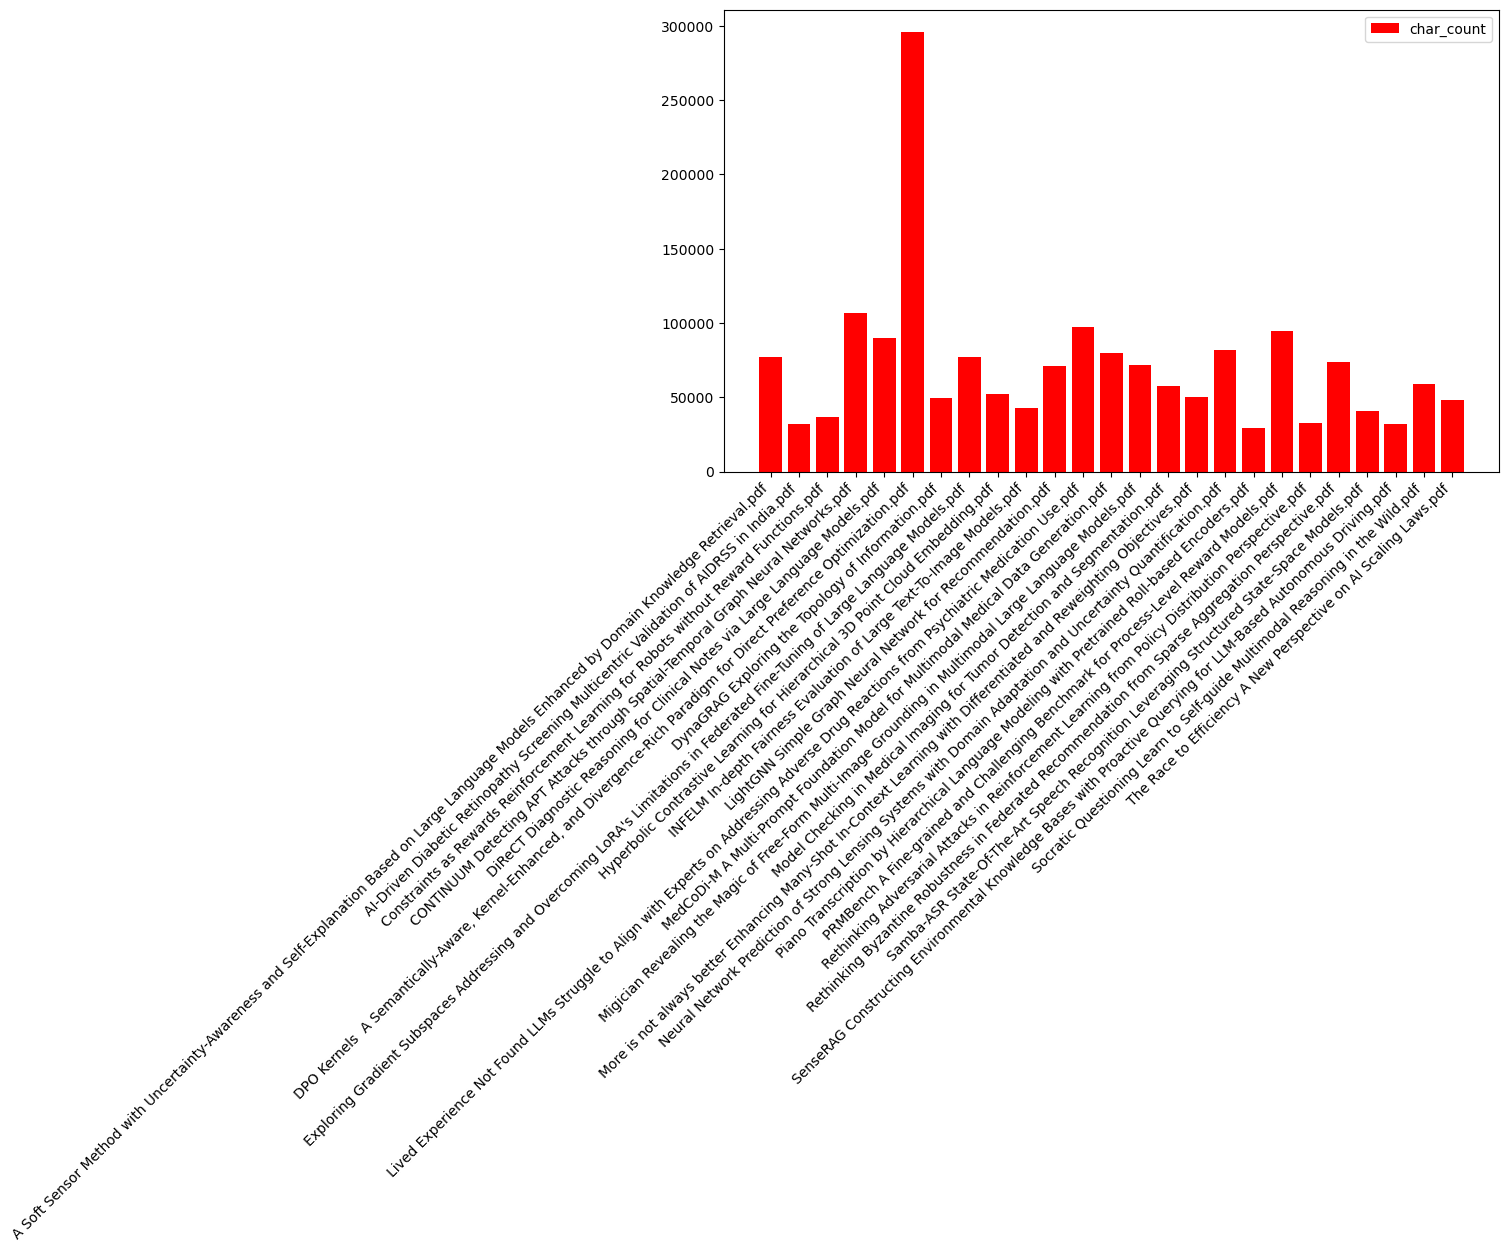

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))  # 図のサイズを指定
Y = df["char_count"]
X = df["title"]
ax.bar(X, Y, label="char_count", color="red")
ax.legend()
ax.set_xticklabels(X, rotation=45, ha="right")  # x軸ラベルを45度回転
plt.show()

C:\Users\sk062\AppData\Local\Temp\ipykernel_15680\2977206359.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X, rotation=45, ha="right")  # x軸ラベルを45度回転


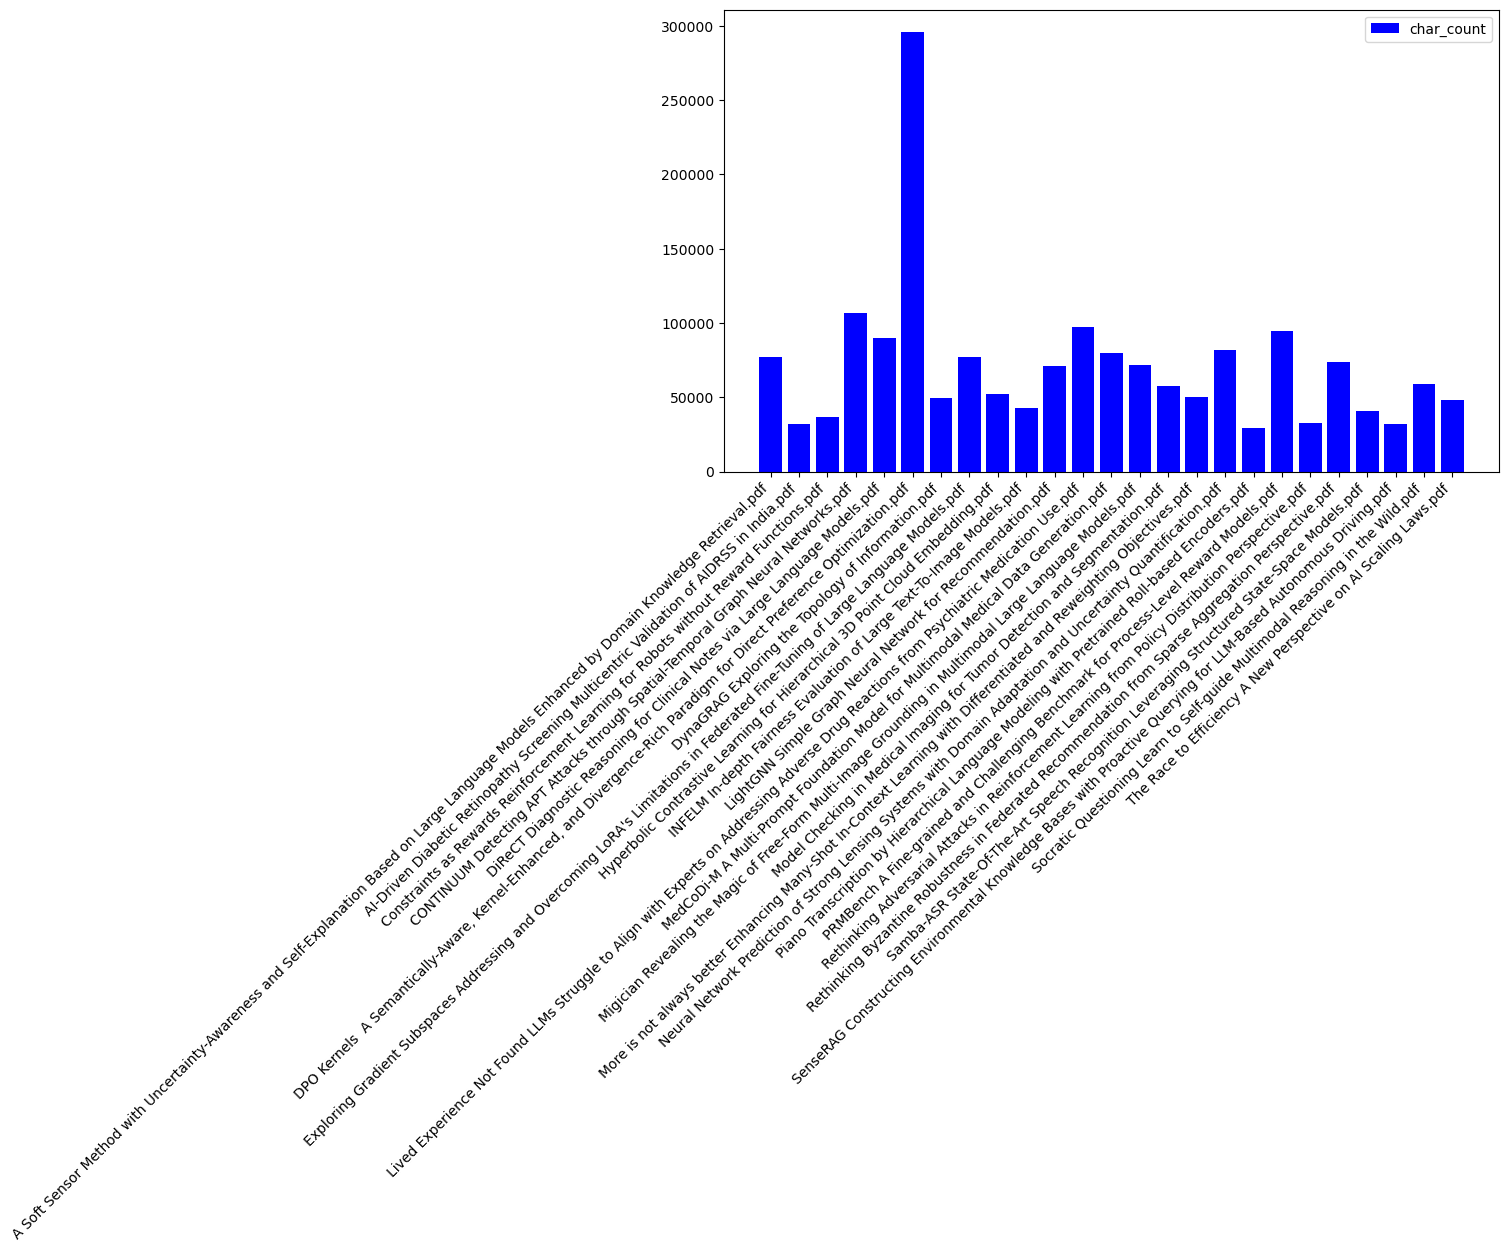

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))  # 図のサイズを指定
Y2 = df["conclusion_char_count"]
X = df["title"]
ax.bar(X, Y, label="char_count", color="blue")
ax.legend()
ax.set_xticklabels(X, rotation=45, ha="right")  # x軸ラベルを45度回転
plt.show()

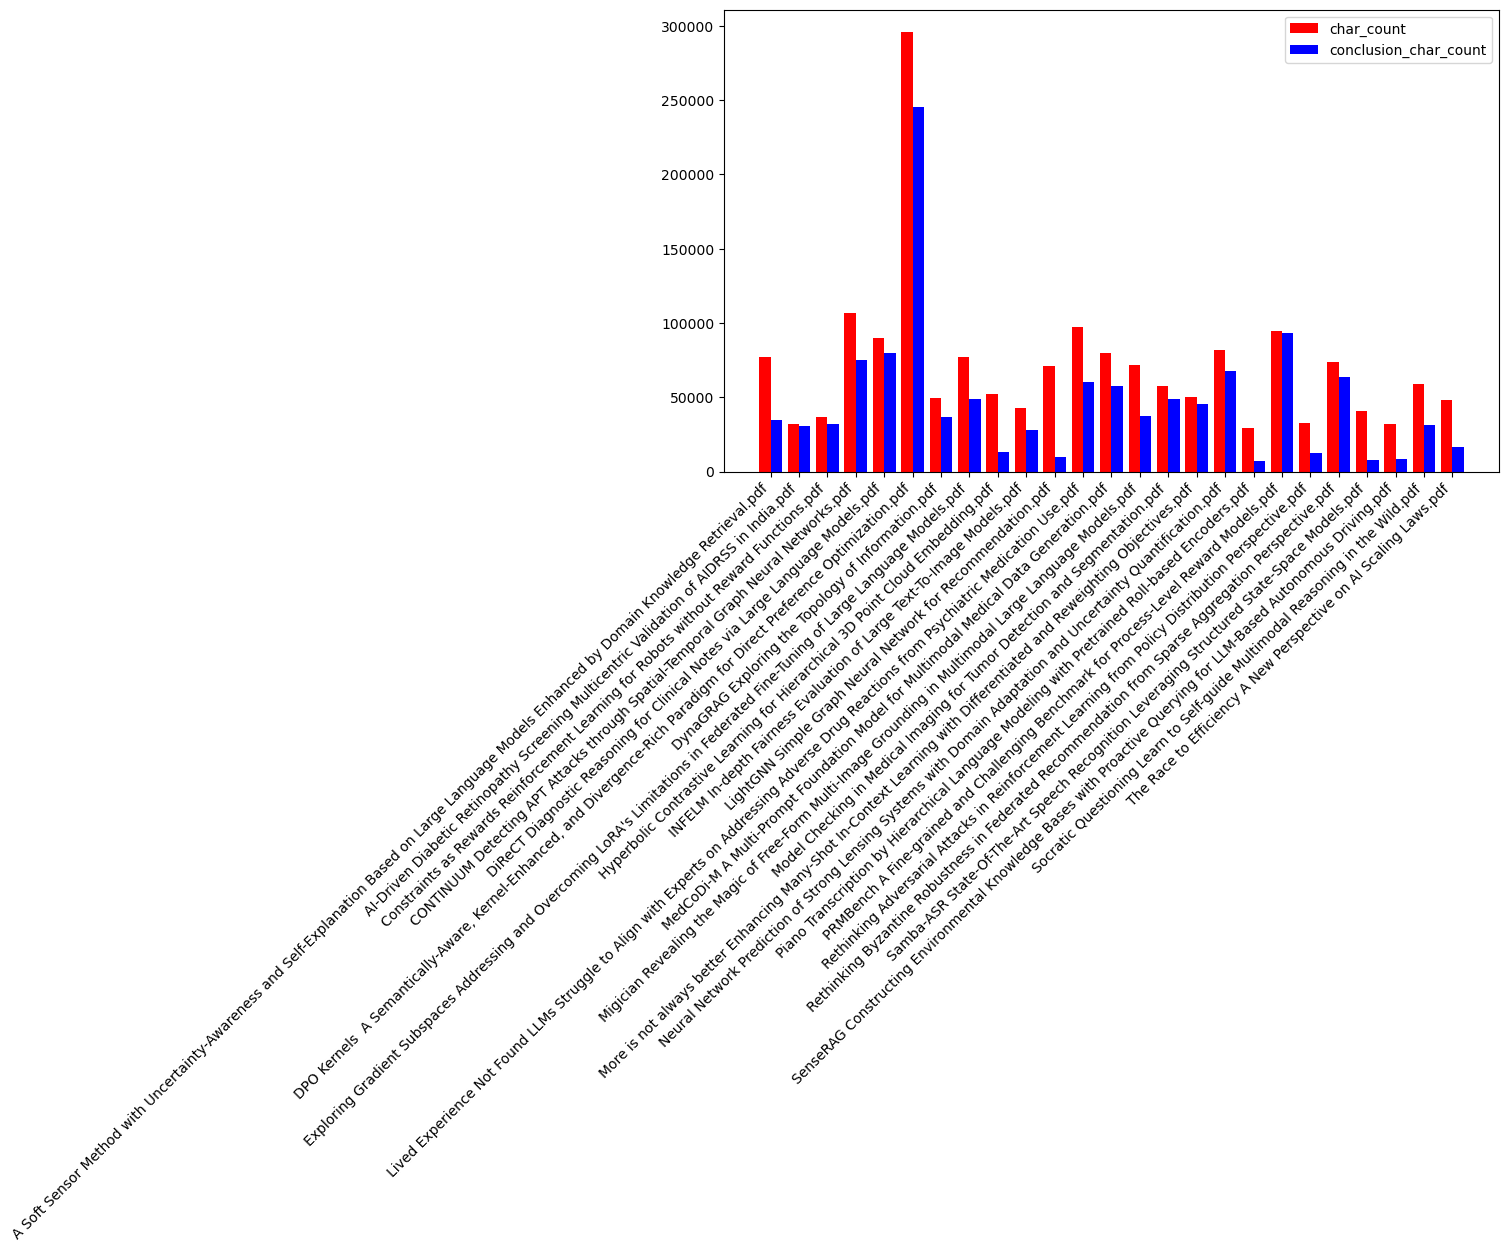

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))  # 図のサイズを指定

Y1 = df["char_count"]
Y2 = df["conclusion_char_count"]
X = np.arange(len(df["title"]))  # x 軸の位置を数値化
width = 0.4  # 棒の幅

ax.bar(X - width / 2, Y1, width=width, label="char_count", color="red")  # 左側
ax.bar(X + width / 2, Y2, width=width, label="conclusion_char_count", color="blue")  # 右側

ax.set_xticks(X)
ax.set_xticklabels(df["title"], rotation=45, ha="right")  # x軸ラベルを45度回転
ax.legend()

plt.show()

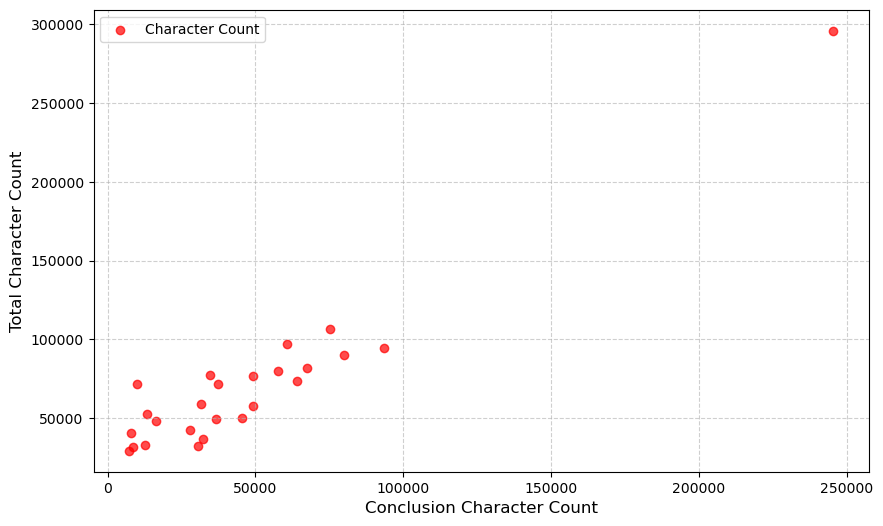

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))  # 図のサイズを指定
X2 = df["conclusion_char_count"]
X3 = df["char_count"]

ax.scatter(X2, X3, c="red", alpha=0.7, label="Character Count")  # alphaで視認性向上
ax.set_xlabel("Conclusion Character Count", fontsize=12)
ax.set_ylabel("Total Character Count", fontsize=12)

ax.grid(True, linestyle="--", alpha=0.6)  # グリッドを破線にして調整
ax.legend(loc="upper left")

plt.show()


In [33]:
# データフレーム df を仮定
scaler = StandardScaler()

# 指定されたカラムを標準化
df[['char_count_z', 'conclusion_char_count_z', 'author_counts_z']] = scaler.fit_transform(df[['char_count', 'conclusion_char_count', 'author_counts']])


In [35]:
df.head()

,title,char_count,top_word_1,top_word_2,top_word_3,top_word_4,top_word_5,top_word_6,top_word_7,top_word_8,top_word_9,top_word_10,top_word_11,top_word_12,top_word_13,top_word_14,top_word_15,top_word_16,top_word_17,top_word_18,top_word_19,top_word_20,summary,conclusion_char_count,Link,Author,timestamp,Author1,Author2,Author3,Author4,Author5,Author6,Author7,Author8,Author9,Author10,Author11,author_counts,char_count_z,conclusion_char_count_z,author_counts_z
0,A Soft Sensor Method with Uncertainty-Awarenes...,77094.0,llm,soft,ufss,data,fig,llms,sensor,samples,auxiliary,variable,based,zavs,process,results,industrial,variables,confidence,methods,prediction,pt,A Soft Sensor Method with Uncertainty-Awarenes...,34646.0,https://arxiv.org/abs/2501.01433,"Itsuki Maeda, Yasuhiro Inoue",2025-01-07 14:05:00,Itsuki Maeda,Yasuhiro Inoue,absent,absent,absent,absent,absent,absent,absent,absent,absent,2,0.114898,-0.279505,-1.230769
1,AI-Driven Diabetic Retinopathy Screening Multi...,32254.0,aidrss,dr,screening,specificity,diabetic,retinopathy,sensitivity,study,images,based,deep,learning,clahe,performance,ci,s,ai,fundus,using,feature,Artificial Intelligence-based Diabetic Retinop...,30549.0,https://arxiv.org/abs/2501.01973,"Di Jin, Xing Liu, Yu Liu, Jia Qing Yap, Andrea...",2025-01-08 11:38:00,Di Jin,Xing Liu,Yu Liu,Jia Qing Yap,Andrea Wong,Adriana Crespo,Qi Lin,Zhiyuan Yin,Qiang Yan,Ryan Ye,absent,10,-0.764699,-0.366808,1.333333
2,Constraints as Rewards Reinforcement Learning ...,36757.0,t,s,p,cid,constraint,robot,learning,task,policy,pose,constraints,e,m,n,reward,function,g,lagrangian,functions,reinforcement,Reinforcement learning has become an essential...,32234.0,https://arxiv.org/abs/2501.02156,Chien-Ping Lu,2025-01-08 11:38:00,Chien-Ping Lu,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent,1,-0.676367,-0.330903,-1.551282
3,CONTINUUM Detecting APT Attacks through Spatia...,106646.0,graph,s,h,k,j,al,m,data,et,l,c,d,model,y,w,n,detection,node,e,v,TraditionalIntrusionDetectionSystems (IDS) oft...,75113.0,https://arxiv.org/abs/2501.02024,"Elhoucine Elfatimi, Lahcen El fatimi",2025-01-08 11:38:00,Elhoucine Elfatimi,Lahcen El fatimi,absent,absent,absent,absent,absent,absent,absent,absent,absent,2,0.694600,0.582802,-1.230769
4,DiReCT Diagnostic Reasoning for Clinical Notes...,90052.0,d,e,gpt,response,r,o,observation,note,g,etal,t,disease,diagnosis,n,k,heart,m,observations,s,p,DiReCT: Diagnostic Reasoning for Clinical Note...,79997.0,https://arxiv.org/abs/2501.02285,"Yingjie Liu, Pengyu Zhang, Ziyao He, Mingsong ...",2025-01-08 11:38:00,Yingjie Liu,Pengyu Zhang,Ziyao He,Mingsong Chen,Xuan Tang,Xian Wei,absent,absent,absent,absent,absent,6,0.369086,0.686875,0.051282


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # 図のサイズを指定
X2 = df["conclusion_char_count_z"]
X3 = df["char_count_z"]

ax.scatter(X2, X3, c="red", alpha=0.7, label="Character Count")  # alphaで視認性向上
ax.set_xlabel("Conclusion Character Count(Z Score)", fontsize=12)
ax.set_ylabel("Total Character Count(Z Score)", fontsize=12)

ax.grid(True, linestyle="--", alpha=0.6)  # グリッドを破線にして調整
ax.legend(loc="upper left")

plt.show()
